In [116]:
import geopandas as gpd

In [117]:
roads = gpd.read_file('SH_Road.shp')
roads.head()

,ID,DISTNAME,ROADNUMBER,CLASSIFICA,DRAWLEVEL,OVERRIDE,FEATCODE,geometry
0,ED8E3F1E-3ADA-40A6-8D96-B9CE5246135F,None,None,Local Road,0,F,15760,"LINESTRING Z (248668.970 387486.850 0.000, 248..."
1,77845DFB-ECFF-4DD4-A484-506845DF2435,None,None,Restricted Local Access Road,0,F,15762,"LINESTRING Z (248833.550 387822.120 0.000, 248..."
2,5E0208DE-B110-4963-BAA2-1DDB71FAF6BD,None,None,Local Road,0,F,15760,"LINESTRING Z (248833.550 387822.120 0.000, 248..."
3,08461678-B973-45ED-93CA-B3BABD98BC75,None,None,Restricted Local Access Road,0,F,15762,"LINESTRING Z (248753.190 387361.020 0.000, 248..."
4,2BE50484-C47E-46A4-8FDB-BE3BA4CBE107,None,None,Restricted Local Access Road,0,F,15762,"LINESTRING Z (248813.120 387329.190 0.000, 248..."


In [118]:
selected_ids = ['131324F8-FBCD-4389-B15E-B4EF4021D593',
                '1D5F1288-107D-485D-8CF2-C1117D328C9B',
                'FE5D98A4-BCB2-4016-84CD-045B94858A3F']
selected_ids = ['0807C27F-5B78-4265-8E5B-32DE499D846A']
selected_roads = roads[roads['ID'].isin(selected_ids)]
selected_roads

,ID,DISTNAME,ROADNUMBER,CLASSIFICA,DRAWLEVEL,OVERRIDE,FEATCODE,geometry
39196,0807C27F-5B78-4265-8E5B-32DE499D846A,None,None,Restricted Local Access Road,0,F,15762,"LINESTRING Z (256493.830 325710.310 0.000, 256..."


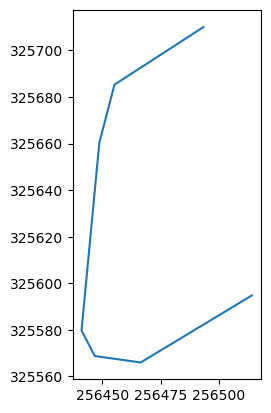

In [119]:
selected_roads.plot()

In [120]:
search_margin = 20

In [121]:
selected_roads.bounds

,minx,miny,maxx,maxy
39196,256441.08,325566.0,256514.58,325710.31


In [122]:
all_bounds = (min(selected_roads.bounds['minx'])-search_margin,
              min(selected_roads.bounds['miny'])-search_margin,
              max(selected_roads.bounds['maxx'])+search_margin,
              max(selected_roads.bounds['maxy'])+search_margin)
all_bounds

(256421.08000000002, 325546.0, 256534.58000000002, 325730.31)

In [123]:
max_extent = max((all_bounds[2]-all_bounds[0],
                  all_bounds[3]-all_bounds[1]))
centre = (0.5*(all_bounds[2]+all_bounds[0]),
          0.5*(all_bounds[3]+all_bounds[1]))
print(centre,max_extent)

(256477.83000000002, 325638.155) 184.30999999999767


In [124]:
from scipy.stats.qmc import PoissonDisk

In [125]:
import numpy as np

In [126]:
radius = 5.0
num_samples = (max_extent/radius)**2
sampler = PoissonDisk(d=2, radius=radius/max_extent)
scaled_samples = max_extent*(sampler.random(num_samples)-0.5)
num_samples = np.size(scaled_samples,0)
samples = scaled_samples + np.tile(np.array(centre),(num_samples,1))
print(samples,num_samples)

[[256470.85913971 325679.34032811]
 [256463.76970214 325680.09418285]
 [256467.15610121 325675.83803311]
 ...
 [256568.12118461 325561.61068811]
 [256388.57248097 325579.66317507]
 [256385.91713563 325563.97582409]] 840


In [182]:
from shapely import Point, LineString

In [128]:
sample_points = [Point(samples[ii,0],samples[ii,1]) for ii in range(num_samples)]

In [129]:
sample_points = gpd.GeoSeries(sample_points,crs=roads.crs)

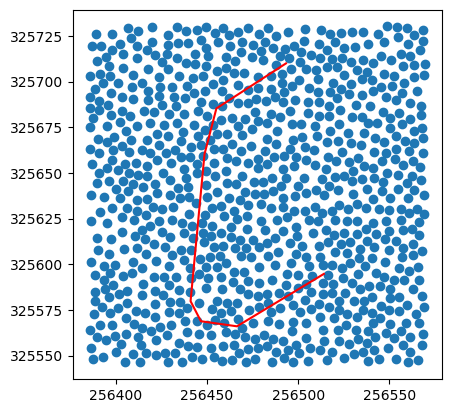

In [130]:
ax = sample_points.plot()
selected_roads.plot(ax=ax,color='red')

In [131]:
sample_distances = [min(selected_roads.distance(p)) for p in sample_points]
sample_distances

[13.518878785424297,
 9.034855344862628,
 13.933768722207105,
 18.13767688615372,
 3.9984089968420866,
 7.014939928653571,
 20.21502073988178,
 13.022753605520121,
 17.438028106208343,
 23.384499572337276,
 13.180898656534563,
 9.11373616707679,
 19.102625066199927,
 31.327547723904246,
 28.83744288762611,
 3.9695307876173387,
 9.181174614860165,
 4.234634679213851,
 0.31637458339925195,
 3.95926231473163,
 0.45296713780638254,
 3.1261152339496725,
 0.8304102029704484,
 4.284612476624839,
 0.8108019911201177,
 28.418548939683706,
 34.166726171947545,
 22.033089028779003,
 11.392350899784708,
 9.377427478586858,
 6.0731143473761025,
 11.089359756471117,
 8.067033447541592,
 10.993599649987843,
 12.373290359818501,
 37.200968582535026,
 41.78569988765142,
 2.057249352776051,
 12.94276724751895,
 16.27118200384106,
 4.207193054948536,
 5.866611033883782,
 17.405085870823694,
 1.0182135129412229,
 8.380917666139586,
 13.118469641157672,
 18.478488018467196,
 22.63957478611519,
 29.73299189

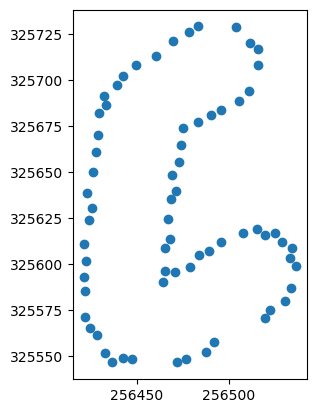

In [132]:
flags = [d < search_margin+0.95*radius and d > search_margin for d in sample_distances]
edge_points = sample_points[flags]
edge_points.plot()

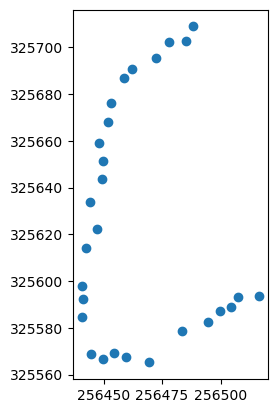

In [133]:
flags = [d < 0.5*radius for d in sample_distances]
road_points = sample_points[flags]
road_points.plot()

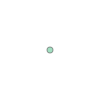

In [134]:
top_arg = np.argmax(edge_points.y)
top_point = edge_points.iloc[top_arg]
top_point

In [135]:
from shapely.ops import nearest_points

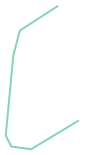

In [136]:
selected_roads.unary_union

In [137]:
top_nearest = gpd.GeoSeries(nearest_points(top_point, selected_roads.unary_union))

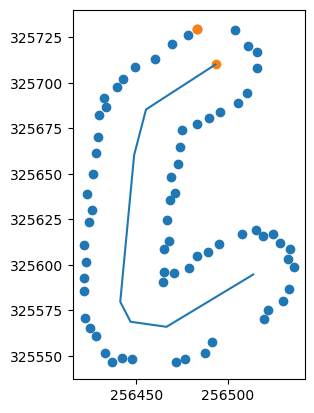

In [138]:
ax = edge_points.plot()
selected_roads.plot(ax=ax)
top_nearest.plot(ax=ax)

In [139]:
opposite_point = Point(top_point.x + 2*(top_nearest[1].x - top_point.x),
                       top_point.y + 2*(top_nearest[1].y - top_point.y))

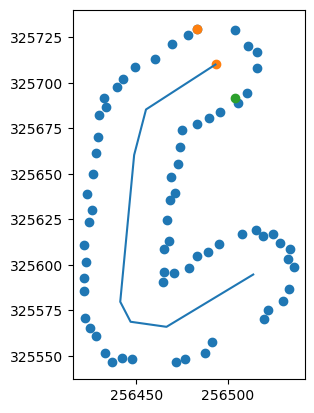

In [140]:
ax = edge_points.plot()
selected_roads.plot(ax=ax)
top_nearest.plot(ax=ax)
gpd.GeoSeries([opposite_point]).plot(ax=ax)

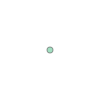

In [141]:
start_point = top_point
start_point

In [216]:
def opposing_point(first_point, overshoot=1.0):
    nearest_road = nearest_points(first_point, selected_roads.unary_union)[1]
    opposite_point = Point(first_point.x + (1.0+overshoot)*(nearest_road.x - first_point.x),
                           first_point.y + (1.0+overshoot)*(nearest_road.y - first_point.y))
    return opposite_point

opposing_point(start_point.geometry).xy

(array('d', [256504.30581461027]), array('d', [325691.36564163776]))

In [167]:
gdf_edge_points = gpd.GeoDataFrame(geometry=edge_points)
gdf_edge_points['visited'] = False

In [168]:
def closest_unvisited_edge_point_name(target_point):
    unvisited_points = gdf_edge_points[gdf_edge_points['visited']==False]
    ix_closest = np.argmin(unvisited_points.distance(target_point))
    closest_point_name = unvisited_points.iloc[ix_closest].name
    return closest_point_name
closest_point_name = closest_unvisited_edge_point_name(opposite_point)

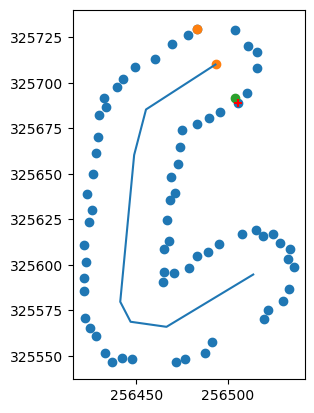

In [169]:
ax = edge_points.plot()
selected_roads.plot(ax=ax)
top_nearest.plot(ax=ax)
gpd.GeoSeries([opposite_point]).plot(ax=ax)
gdf_edge_points[gdf_edge_points.index==closest_point_name].plot(ax=ax,color='r',marker='+')

In [175]:
start_point = gdf_edge_points.iloc[top_arg]
gdf_edge_points.loc[start_point.name,'visited'] = True

In [209]:
current_point = start_point
gdf_edge_points['visited'] = False
gdf_edge_points.loc[start_point.name,'visited'] = True
tour = [start_point.geometry]
for ii in range(len(gdf_edge_points)):
    opposite_point = opposing_point(current_point.geometry)
    closest_point_name = closest_unvisited_edge_point_name(opposite_point)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    closest_point_name = closest_unvisited_edge_point_name(current_point.geometry)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    
tour

[<POINT (256483.354 325729.254)>,
 <POINT (256505.513 325688.642)>,
 <POINT (256510.745 325694.273)>,
 <POINT (256478.36 325726.3)>,
 <POINT (256469.44 325721.488)>,
 <POINT (256495.706 325684.069)>,
 <POINT (256490.032 325680.869)>,
 <POINT (256460.368 325713.244)>,
 <POINT (256449.38 325708.514)>,
 <POINT (256474.802 325673.916)>,
 <POINT (256483.203 325677.186)>,
 <POINT (256442.422 325702.11)>,
 <POINT (256439.267 325697.461)>,
 <POINT (256474.073 325664.9)>,
 <POINT (256472.71 325655.633)>,
 <POINT (256427.564 325661.153)>,
 <POINT (256428.78 325670.175)>,
 <POINT (256469.095 325648.212)>,
 <POINT (256471.007 325639.734)>,
 <POINT (256422.886 325638.887)>,
 <POINT (256425.489 325630.239)>,
 <POINT (256466.71 325624.637)>,
 <POINT (256468.226 325635.409)>,
 <POINT (256425.936 325649.907)>,
 <POINT (256424.025 325623.697)>,
 <POINT (256468.089 325613.376)>,
 <POINT (256465.188 325608.799)>,
 <POINT (256421.276 325610.944)>,
 <POINT (256422.25 325601.825)>,
 <POINT (256465.038 325595

In [269]:
current_point = start_point
gdf_edge_points['visited'] = False
gdf_edge_points.loc[start_point.name,'visited'] = True
start_road = nearest_points(current_point.geometry, selected_roads.unary_union)[1]
tour = [Point(start_road.x,start_road.y),start_point.geometry]
for ii in range(len(gdf_edge_points)):
    nearest_road = nearest_points(current_point.geometry, selected_roads.unary_union)[1]
    tour.append(Point(nearest_road.x,nearest_road.y))
    opposite_point = opposing_point(current_point.geometry,overshoot=0.75)
    closest_point_name = closest_unvisited_edge_point_name(opposite_point)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    closest_point_name = closest_unvisited_edge_point_name(current_point.geometry)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    
tour

[<POINT (256493.83 325710.31)>,
 <POINT (256483.354 325729.254)>,
 <POINT (256493.83 325710.31)>,
 <POINT (256505.513 325688.642)>,
 <POINT (256510.745 325694.273)>,
 <POINT (256493.83 325710.31)>,
 <POINT (256478.36 325726.3)>,
 <POINT (256469.44 325721.488)>,
 <POINT (256481.738 325702.48)>,
 <POINT (256495.706 325684.069)>,
 <POINT (256490.032 325680.869)>,
 <POINT (256477.728 325699.886)>,
 <POINT (256460.368 325713.244)>,
 <POINT (256449.38 325708.514)>,
 <POINT (256461.68 325689.503)>,
 <POINT (256474.802 325673.916)>,
 <POINT (256483.203 325677.186)>,
 <POINT (256471.234 325695.685)>,
 <POINT (256442.422 325702.11)>,
 <POINT (256439.267 325697.461)>,
 <POINT (256455.23 325685.33)>,
 <POINT (256474.073 325664.9)>,
 <POINT (256472.71 325655.633)>,
 <POINT (256448.491 325657.93)>,
 <POINT (256427.564 325661.153)>,
 <POINT (256428.78 325670.175)>,
 <POINT (256449.852 325664.686)>,
 <POINT (256469.095 325648.212)>,
 <POINT (256471.007 325639.734)>,
 <POINT (256446.982 325642.012)>,
 

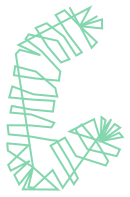

In [270]:
tour_line = LineString(tour)
tour_line

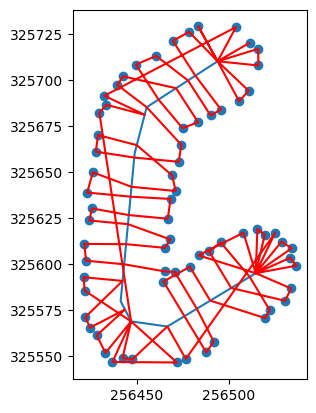

In [271]:
ax = edge_points.plot()
selected_roads.plot(ax=ax)
gdf_tour = gpd.GeoDataFrame(geometry=[tour_line])
gdf_tour.plot(ax=ax,color='red')

In [237]:
gdf_tour.crs = 'EPSG:27700'
gdf_tour_gps = gdf_tour.to_crs('EPSG:4326')

In [236]:
gdf_tour.to_file('tour.shp')

In [238]:
gdf_tour_gps.to_file('tour_gps.shp')

In [264]:
from pymavlink.mavwp import MAVWPLoader
from pymavlink.dialects.v20.common import MAVLink_mission_item_int_message, MAV_CMD_NAV_TAKEOFF, MAV_CMD_NAV_LAND

In [272]:
gdf_tour_gps['geometry'][0].coords[0]

(-4.130689812165837, 52.80995672644571)

In [265]:
alt = 20
alt_frame = 3
wp = MAVWPLoader()
takeoff_cmd = MAVLink_mission_item_int_message(
            1, # wp.target_system,
            1, # wp.target_component,
            0, # wp.seq,
            alt_frame, # wp.frame,
            MAV_CMD_NAV_TAKEOFF, # wp.command,
            0, # wp.current,
            1, # wp.autocontinue,
            0, # wp.param1,
            0, # wp.param2,
            0, # wp.param3,
            0, # wp.param4,
            0, # int(wp.x*1.0e7),
            0, # int(wp.y*1.0e7),
            alt) # wp.z
wp.add(takeoff_cmd)

In [266]:
for pt in gdf_tour_gps['geometry'][0].coords:
    wp.add_latlonalt(pt[1],pt[0],20.0)

In [ ]:
land_cmd = MAVLink_mission_item_int_message(
            1, # wp.target_system,
            1, # wp.target_component,
            0, # wp.seq,
            alt_frame, # wp.frame,
            MAV_CMD_NAV_LAND, # wp.command,
            0, # wp.current,
            1, # wp.autocontinue,
            0, # wp.param1,
            0, # wp.param2,
            0, # wp.param3,
            0, # wp.param4,
            int(gdf_tour_gps['geometry'][0].coords[0][1]*1.0e7), # int(wp.x*1.0e7), lat
            int(gdf_tour_gps['geometry'][0].coords[0][0]*1.0e7), # int(wp.y*1.0e7), lon
            0) # wp.z
wp.add(takeoff_cmd)

In [ ]:
    
file_name = 'mission.txt'
wp.save(file_name)

%cat mission.txt

In [ ]:
        return 